In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

In [32]:
predict = pd.read_csv('predict/data_v3/oie_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'])
predict_ent = pd.read_csv('predict/data_v3/oie_def_ent_root/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'])
predict_base = pd.read_csv('predict/data_v3/oie_no_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'])

In [33]:
# Calculate model performance
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
precision, recall, thresholds = precision_recall_curve(label, label_scores)

label_ent = np.array(predict_ent['label'], dtype=int)
label_scores_ent = np.array(predict_ent['dist'])
precision_ent, recall_ent, thresholds_ent = precision_recall_curve(label_ent, label_scores_ent)

# Calculate baseline performance
label_base = np.array(predict_base['label'], dtype=int)
label_scores_base = np.array(predict_base['dist'])
precision_base, recall_base, thresholds_base = precision_recall_curve(label_base, label_scores_base)

In [34]:
len(precision), len(precision_ent)

(12388, 41293)

<Figure size 432x288 with 0 Axes>

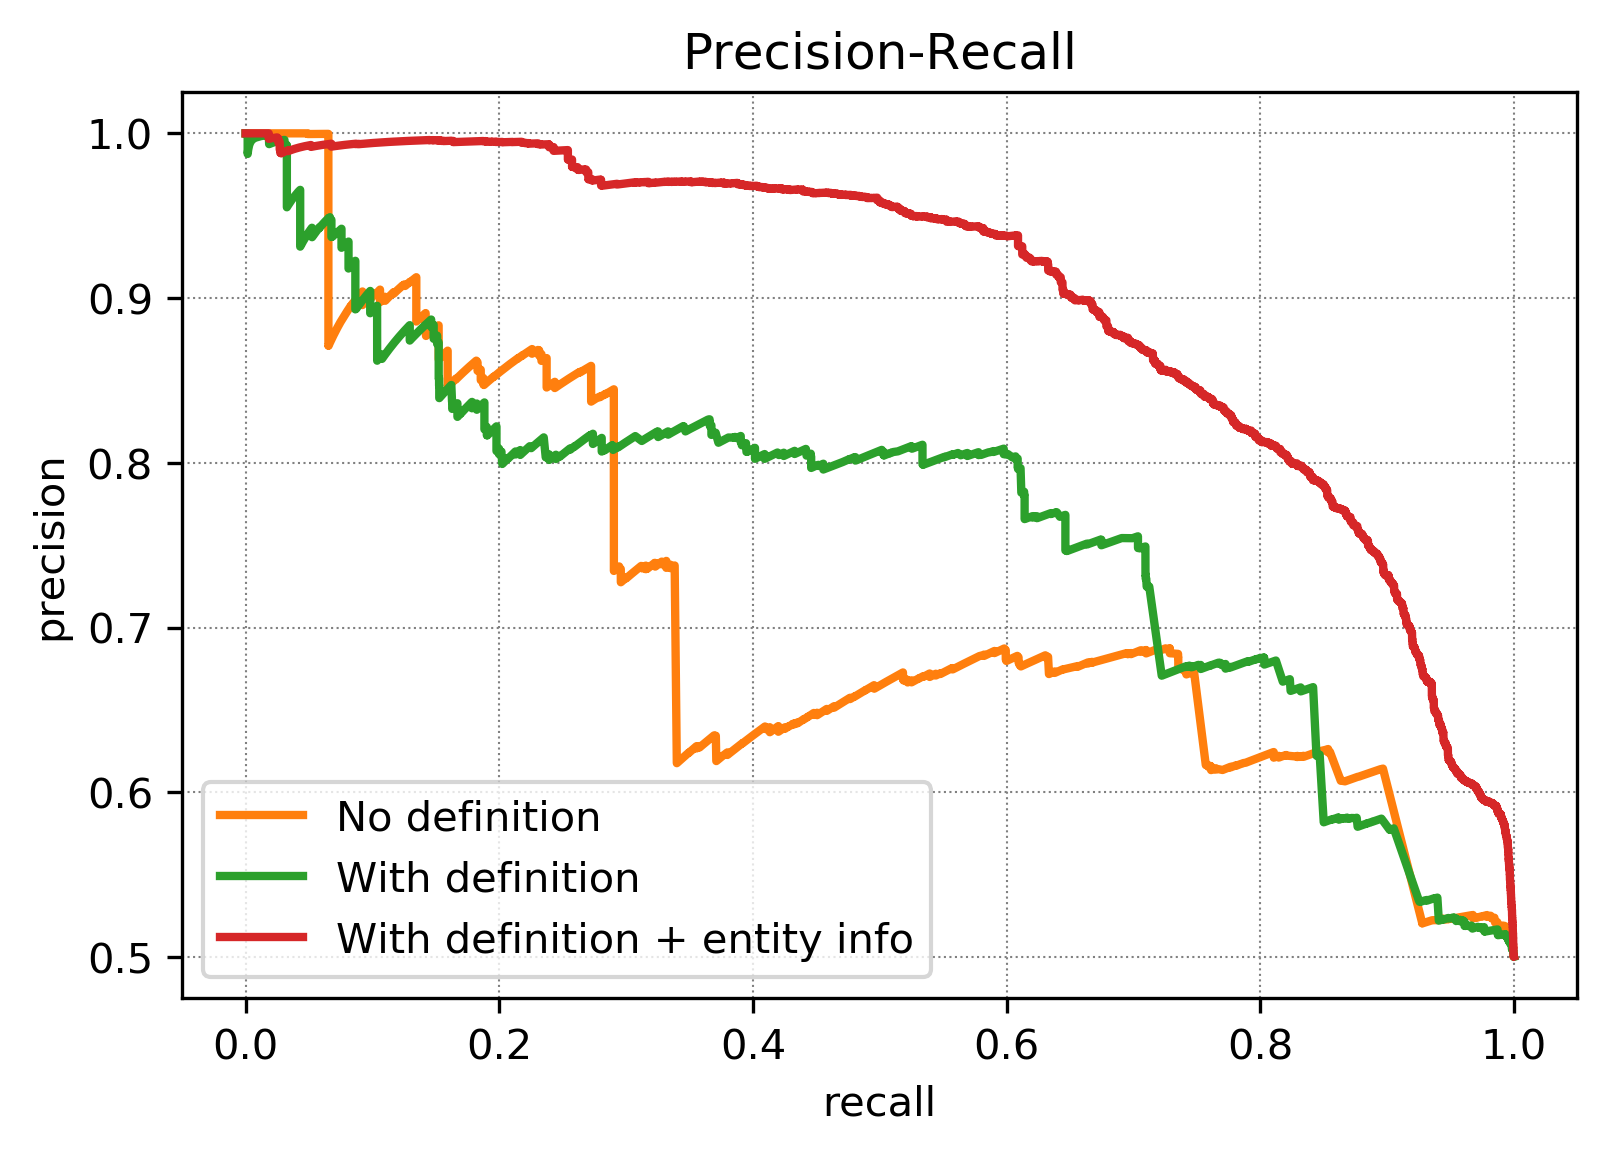

In [35]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base, precision_base, lw=2, color='C1', ls='-', label='No definition')
plt.plot(recall, precision, lw=2, color='C2', ls='-', label='With definition')
plt.plot(recall_ent, precision_ent, lw=2, color='C3', ls='-', label='With definition + entity info')

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='lower left')
plt.show()

In [36]:
average_precision_score(label, label_scores), average_precision_score(label_ent, label_scores_ent), average_precision_score(label_base, label_scores_base)

(0.7640186672739502, 0.9020981377879727, 0.7139324342757498)

### Visualize Embedding

In [80]:
rel_vector = pd.read_csv('predict/data_v3/oie_def_ent_root/rel_embed_vector.tsv', sep='\t', header=None, names=['el1', 'el2'])
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'label']
test_align = pd.read_csv('dataset/test_align_filtered_balanced.tsv', sep='\t', header=None, names=data_header)
rel_label = test_align['rel_oie']
rel_label_unique = pd.read_csv('predict/data_v3/oie_def_ent_root/rel_embed_label.tsv', sep='\t', header=None, names=['label'])
rel_label_unique = rel_label_unique.drop_duplicates()

In [81]:
rel_label[0]

'are'

In [82]:
vector_x = []
vector_y = []
for index, row in rel_label_unique.iterrows():
    vector_x.append(rel_vector['el1'][index])
    vector_y.append(rel_vector['el2'][index])

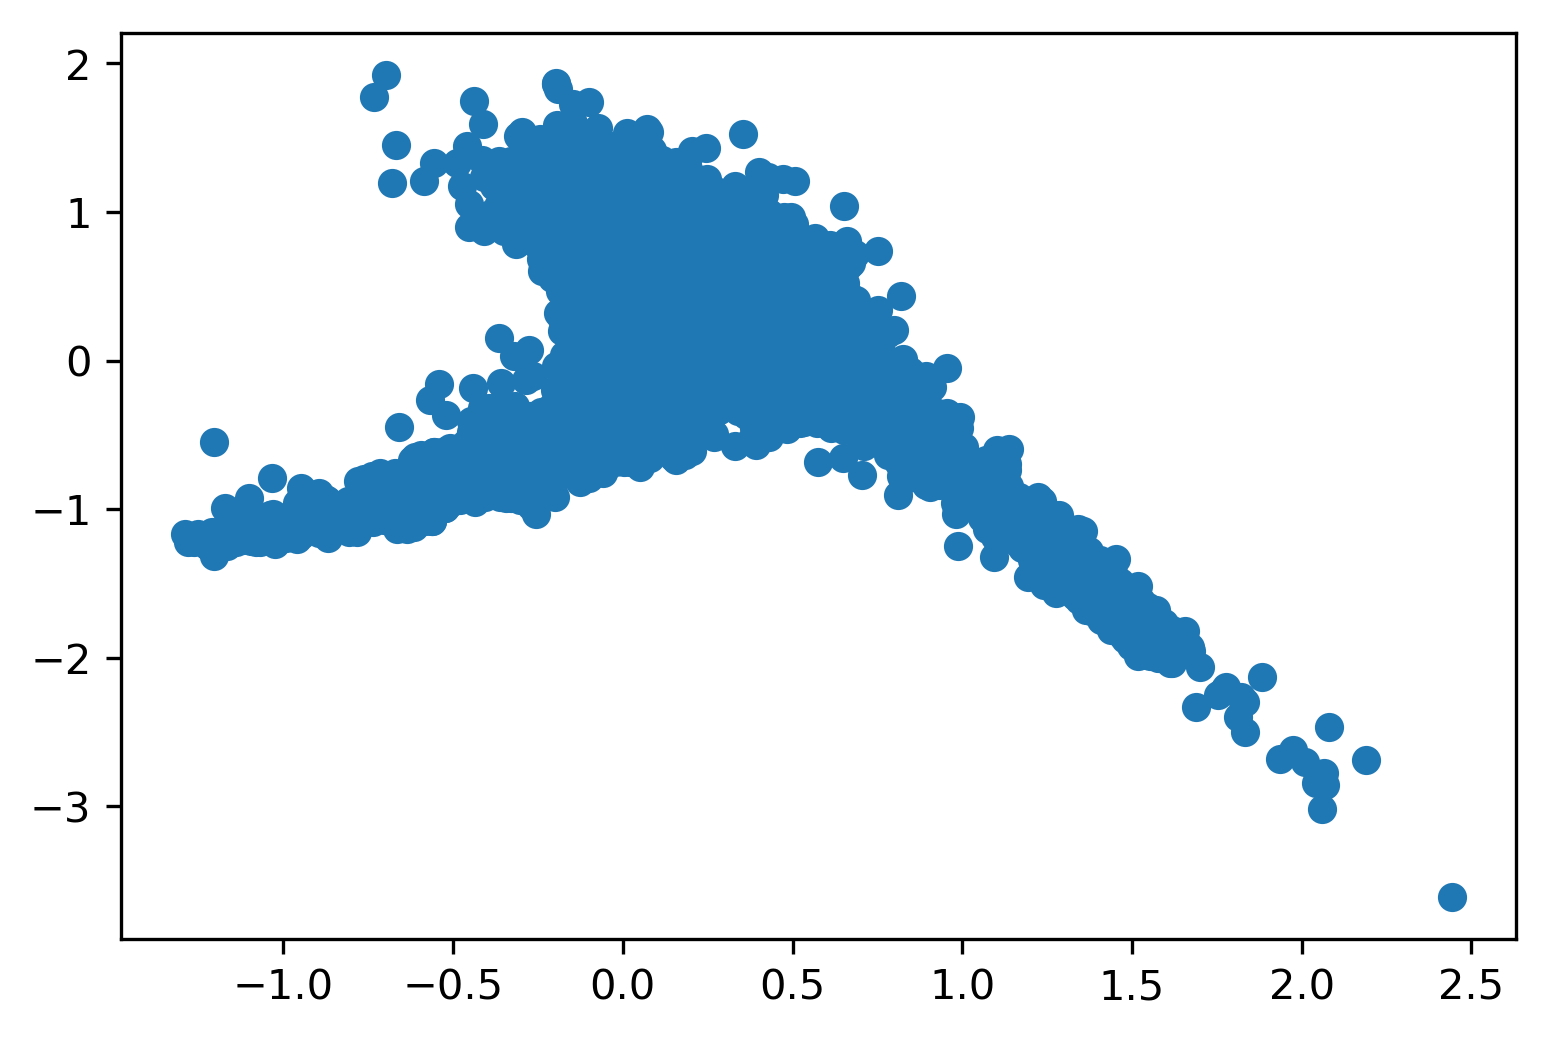

In [83]:
fig, ax = plt.subplots(dpi=300)
# plt.ylim((-1.75, 2.25))
# plt.xlim((-2.25, 1.75))
ax.scatter(vector_x, vector_y)

In [91]:
vector_x = []
vector_y = []
label = []
observed_label = [#'was daughter of', 'was son of',
                  'are languages of', 'are official languages of', 'is spoken in',
#                   'is nation in', 'is state in', 'is country in'
                 ]
for index, row in rel_label_unique.iterrows():
    label_txt = rel_label[index]
    if label_txt in observed_label:
        label.append(label_txt)
        vector_x.append(rel_vector['el1'][index])
        vector_y.append(rel_vector['el2'][index])

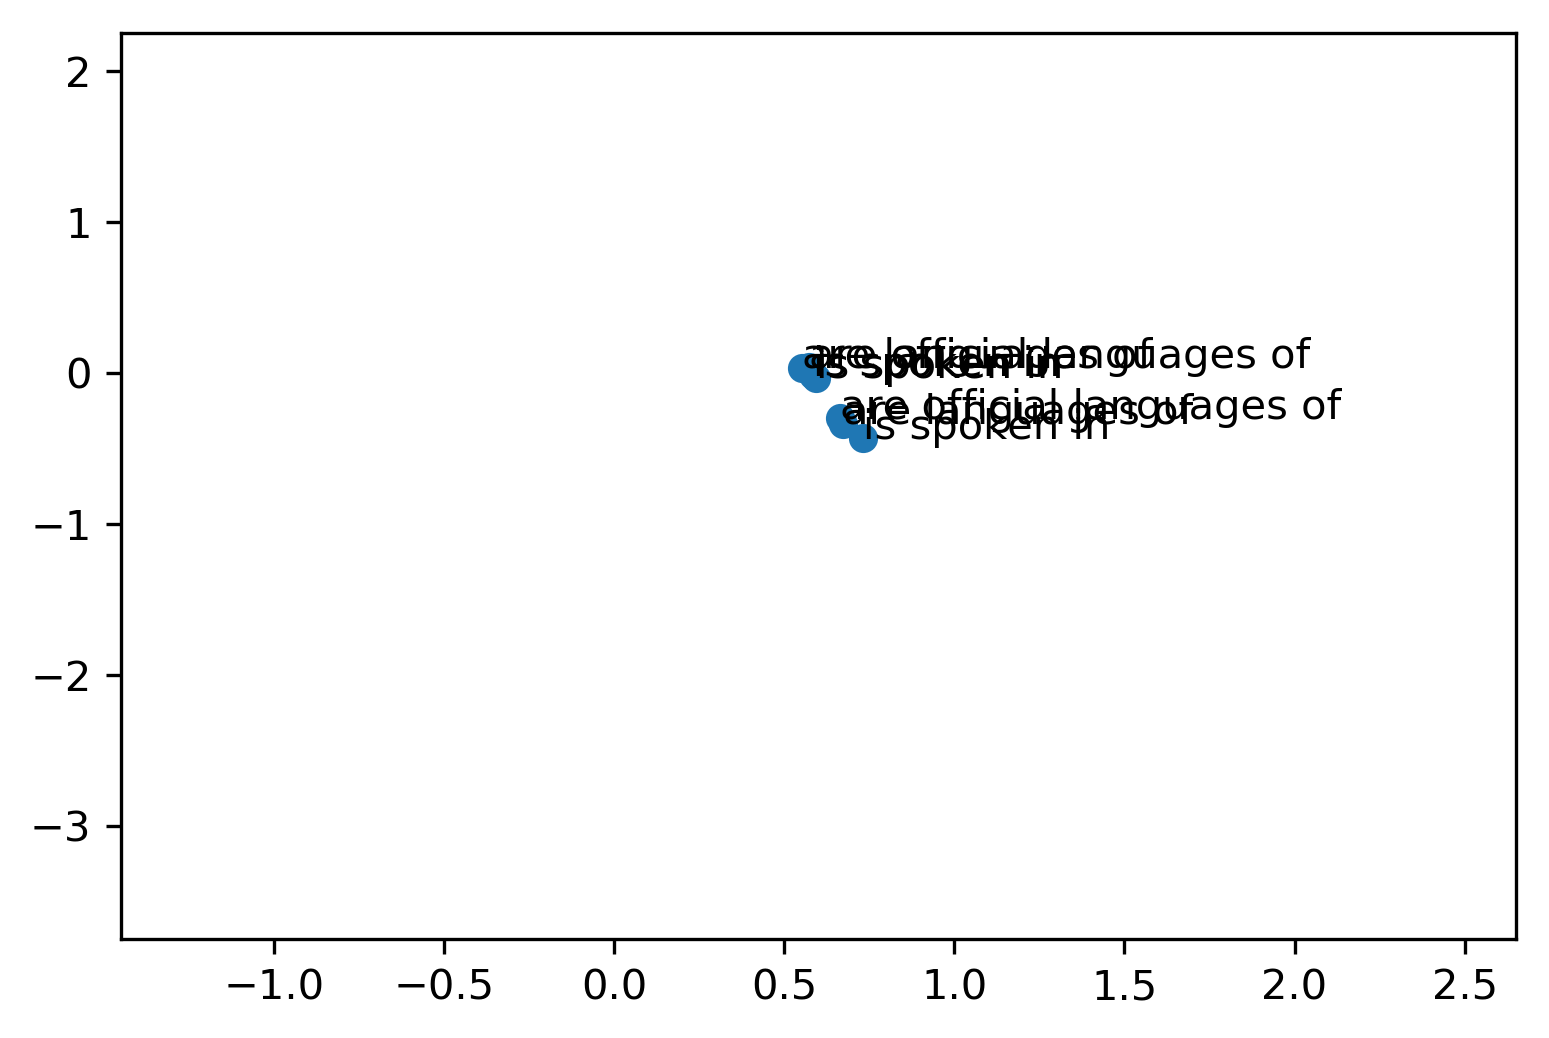

In [92]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(vector_x, vector_y)
plt.ylim((-3.75, 2.25))
plt.xlim((-1.45, 2.65))

for i, txt in enumerate(label):
    ax.annotate(txt, (vector_x[i], vector_y[i]))

### Relation Coverage

In [32]:
rel_predict = pd.read_csv('predict/oie_def_ent_root/predict_result_sort.tsv', sep='\t', header=None, names=['rel_kb', 'rel_oie', 'label'])
rel_predict_0 = rel_predict[rel_predict.label != 1]
rel_predict_1 = rel_predict[rel_predict.label != 0]
rel_oie_0 = set(rel_predict_0['rel_oie'])
rel_oie_1 = set(rel_predict_1['rel_oie'])

In [33]:
rel_oie_0

{"'s Meckler is",
 "'s business is",
 "'s capital is",
 "'s city is",
 "'s father is",
 "'s parents is",
 "'s settlement is",
 "'s son is",
 'Additionally has system in',
 'Bevillard in',
 'Compared to',
 'Council of',
 'Due to',
 'Economically is city in',
 'Economically is most prosperous city in',
 'Economically is prosperous city in',
 'Formerly owned by',
 'Further developments of were',
 'Governor of',
 'However is corrupt country in',
 'However is country in',
 'However is most corrupt country in',
 'However is still corrupt country in',
 'However is still country in',
 'However is still most corrupt country in',
 'King of',
 'Located in',
 'Monarchy of',
 "Museum 's",
 'Originating in',
 'Phantom of',
 'Republic of',
 'University of',
 'accompanies',
 'acquire',
 'administrative center in',
 'adopted',
 'advocated',
 'advocated as late',
 'advocated late',
 'airport in',
 'allowing',
 'also appeared as',
 'also called',
 'also gave',
 'also run education courses in',
 'appeared

In [34]:
uncovered_rel = set([x for x in rel_oie_1 if x not in rel_oie_0])

In [35]:
uncovered_rel

{'Additionally is heartland of',
 'Eventually discovered',
 'Following',
 'Founded as',
 'General of',
 'Helen of',
 'However was moved to',
 'Later was released as',
 'Owing to',
 'Portuguese for',
 'Trained in',
 'acquired',
 'acquired position in',
 'addition to',
 'administered by',
 'after',
 'agreed',
 'along were ceded',
 'along were ceded to',
 'also hosts',
 'also ran agency from',
 'also ran from',
 'also restored',
 'apprentice alongside',
 'are Among',
 'are collection by',
 'are flat lengths of',
 'are from',
 'are languages of',
 'are latest of',
 'are lengths of',
 'are official languages of',
 'are popular uses of',
 'are uses of',
 'arguably stood as',
 'at',
 'at Challenge is',
 'attended',
 'be home to',
 'be released as',
 'be understood as',
 'becomes',
 'becoming',
 'been',
 'began',
 'began Following',
 'being',
 'being constructed near',
 'bore son to',
 'born to',
 'bought majority through',
 'built',
 'came',
 'came in',
 'center for',
 'changed name to',
 'ch

In [37]:
len(uncovered_rel), len(set(rel_predict['rel_oie']))

(408, 1030)

In [38]:
with open('predict/oie_def/uncovered_oie_rel.txt', 'w') as f:
    for item in uncovered_rel:
        f.write("%s\n" % item)